In [14]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import TensorFlow as tf

import statsmodels

import math
import pandas_datareader as web 
from sklearn.preprocessing import MinMaxScaler
import keras.Sequential
#from keras.models import Sequential
#from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight') 

from sklearn.linear_model import LinearRegression

ModuleNotFoundError: No module named 'TensorFlow'

In [2]:
df = pd.read_csv('alv.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-02-02,76.844383,78.378960,76.296829,78.378960,68.305786,909500
1,2015-02-03,79.402016,80.064842,79.236313,79.942360,69.668274,833700
2,2015-02-04,79.445244,80.662827,79.409225,80.201729,69.894310,1503300
3,2015-02-05,80.951012,81.152740,80.360229,80.850143,70.459404,407200
4,2015-02-06,80.612389,80.792511,80.165703,80.331413,70.007309,434500
5,2015-02-09,79.329971,80.641212,79.286743,80.295387,69.975922,362600
6,2015-02-10,81.304031,81.880402,80.612389,81.613831,71.124924,561500
7,2015-02-11,81.419312,81.657059,80.864555,81.419312,70.955406,505900
8,2015-02-12,81.556198,82.197403,81.397697,81.858788,71.338394,681700
9,2015-02-13,81.700287,81.923630,81.397697,81.671471,71.175140,571300


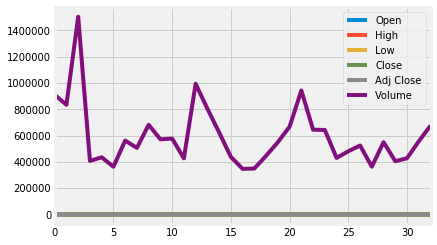

In [3]:
df.plot()
plt.show()

In [4]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,33.000000,33.000000,33.000000,33.000000,33.000000,3.300000e+01
mean,80.791634,81.500306,80.455419,81.190725,70.992913,5.948545e+05
std,1.000715,0.886158,0.994464,0.858928,0.828508,2.385435e+05
min,76.844383,78.378960,76.296829,78.378960,68.305786,3.464000e+05
25%,80.446686,81.023056,80.165703,80.691643,70.563217,4.300000e+05
50%,81.030258,81.743515,80.727669,81.260803,71.099464,5.493000e+05
75%,81.419312,81.995674,81.037460,81.707489,71.534767,6.673000e+05
max,82.146973,83.436600,81.721901,83.018730,72.695564,1.503300e+06


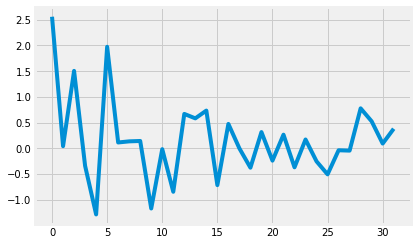

In [5]:
X = df['Open']
diff = list()
for i in range(1, len(X)):
    value = X[i]-X[i-1]
    diff.append(value)
    
plt.plot(diff)
plt.show()

In [6]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,33.000000,33.000000,33.000000,33.000000,33.000000,3.300000e+01
mean,80.791634,81.500306,80.455419,81.190725,70.992913,5.948545e+05
std,1.000715,0.886158,0.994464,0.858928,0.828508,2.385435e+05
min,76.844383,78.378960,76.296829,78.378960,68.305786,3.464000e+05
25%,80.446686,81.023056,80.165703,80.691643,70.563217,4.300000e+05
50%,81.030258,81.743515,80.727669,81.260803,71.099464,5.493000e+05
75%,81.419312,81.995674,81.037460,81.707489,71.534767,6.673000e+05
max,82.146973,83.436600,81.721901,83.018730,72.695564,1.503300e+06


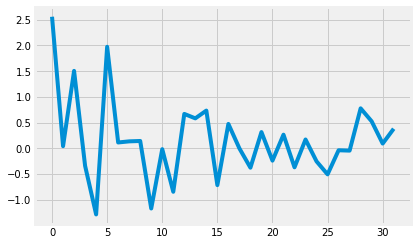

In [7]:
X = df['Open']
diff = list()
for i in range(1, len(X)):
    value = X[i]-X[i-1]
    diff.append(value)
    
plt.plot(diff)
plt.show()

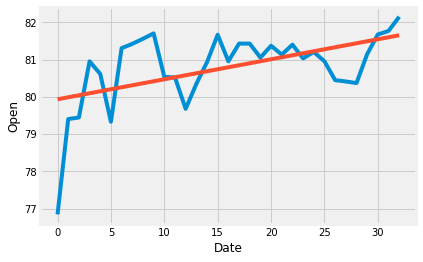

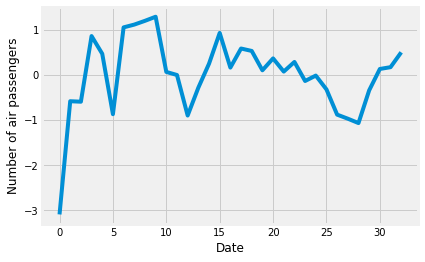

In [9]:
#X = [i for i in range(0, len(df))]
X = np.reshape(X, (len(X), 1))
y = df["Open"].values

model = LinearRegression()
model.fit(X, y)
# calculate trend
trend = model.predict(X)
# plot trend
plt.xlabel('Date')
plt.ylabel('Open')
plt.plot(y)
plt.plot(trend)
plt.show()

# detrend
detrended = [y[i]-trend[i] for i in range(0, len(y))]
# plot detrended
plt.xlabel('Date')
plt.ylabel('Number of air passengers')
plt.plot(detrended)
plt.show()